In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [23]:
dataset = pd.read_csv("car price.csv")
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
dataset.shape

(4340, 8)

In [31]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [43]:
print(dataset["fuel"].unique())
print(dataset["seller_type"].unique())
print(dataset["transmission"].unique())
print(dataset["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [35]:
from sklearn.preprocessing import LabelEncoder


LabelEncoder

In [44]:
le = LabelEncoder()
dataset["fuel_type"]= le.fit_transform(dataset["fuel"])
dataset["seller_type_1"] = le.fit_transform(dataset["seller_type"])
dataset["transmission_type"] = le.fit_transform(dataset["transmission"])
dataset["owner_type"] = le.fit_transform(dataset["owner"])

In [45]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_type,seller_type_1,transmission_type,owner_type
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,1,1,1,0


Splitting the data Training and testing Data

In [47]:
x =dataset[["year","km_driven","fuel_type", "seller_type_1", "transmission_type", "owner_type"]]
y=dataset["selling_price"]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

Training model

In [67]:
li = LinearRegression()

In [68]:
li.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Evaluation

In [76]:
training_data_prediction = li.predict(x_train)

In [77]:
error_score = metrics.r2_score(y_train, training_data_prediction)*100
print("R squared error:",error_score)

R squared error: 44.144601143708414


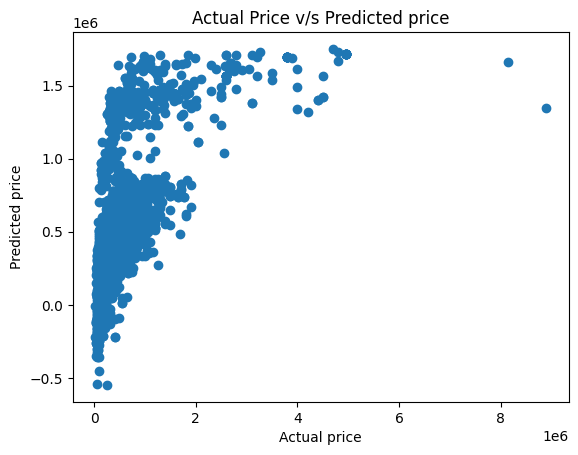

In [78]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Price v/s Predicted price")
plt.show()

In [79]:
test_data_prediction = li.predict(x_test)

In [82]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score*100)

51.48590930573664


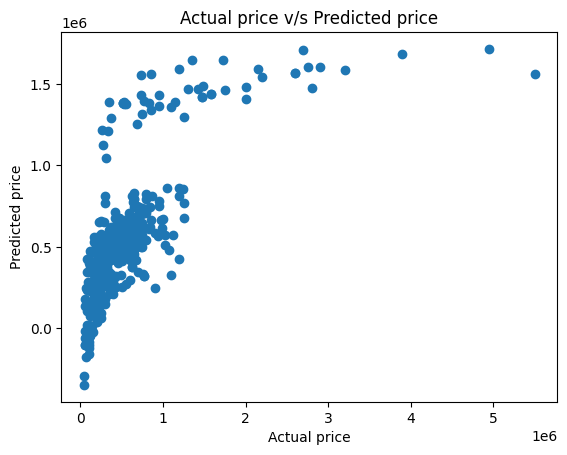

In [83]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price v/s Predicted price")
plt.show()

Lasoo Regression

In [93]:
lr = Lasso()

In [94]:
lr.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [95]:
training_data_pred= lr.predict(x_train)

In [96]:
error_score = metrics.r2_score(y_train, training_data_pred)*100
print("R squared error:",error_score)

R squared error: 44.14460113936829


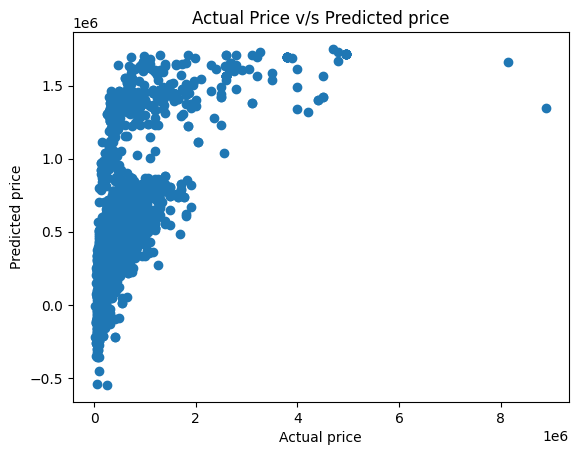

In [97]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Price v/s Predicted price")
plt.show()